# Final Submission: Resolving Educational Institution Problems

* Name: Siti Robiiatul Adawiyyah
* E-mail: adawiyyahsitirobiatul@gmail.com
* Dicoding ID: sitirobiiatul

# Preparation

## Import Libraries

In this section, we import the necessary libraries that will be used throughout the project. These include tools for data manipulation, visualization, preprocessing, machine learning model development, and performance evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Data preprocessing and splitting
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.metrics import classification_report

# Model saving and loading
import joblib
from joblib import dump, load

## Loading the Dataset

At this stage, we will load the dataset provided for analysis

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,Marital_status;Application_mode;Application_order;Course;Daytime_evening_attendance;Previous_qualification;Previous_qualification_grade;Nacionality;Mothers_qualification;Fathers_qualification;Mothers_occupation;Fathers_occupation;Admission_grade;Displaced;Educational_special_needs;Debtor;Tuition_fees_up_to_date;Gender;Scholarship_holder;Age_at_enrollment;International;Curricular_units_1st_sem_credited;Curricular_units_1st_sem_enrolled;Curricular_units_1st_sem_evaluations;Curricular_units_1st_sem_approved;Curricular_units_1st_sem_grade;Curricular_units_1st_sem_without_evaluations;Curricular_units_2nd_sem_credited;Curricular_units_2nd_sem_enrolled;Curricular_units_2nd_sem_evaluations;Curricular_units_2nd_sem_approved;Curricular_units_2nd_sem_grade;Curricular_units_2nd_sem_without_evaluations;Unemployment_rate;Inflation_rate;GDP;Status
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


The dataset is loaded using the pandas library. Since the file uses a semicolon (;) as the delimiter instead of a comma, it is necessary to specify the `sep` parameter to ensure the columns are correctly parsed

In [ ]:
df = pd.read_csv('data.csv', sep=';')

In [ ]:
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Preparation

### Dataset Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

The data contains information at the time of student enrollment, such as academic path, demographic information, and socio-economic factors, along with their academic performance at the conclusion of the first and second semesters.

* Marital status - The marital status of the student
* Application mode - The method of application used by the student
* Application order - The order in which the student applied (between 0 - first choice; and 9 last choice)
* Course - The course taken by the student
* Daytime/evening attendance - Whether the student attends classes during the day or in the evening
* Previous qualification - The qualification obtained by the student before enrolling in higher education
* Previous qualification (grade) - Grade of previous qualification (between 0 and 200)
* Nacionality - The nationality of the student
* Mother's qualification - The qualification of the student's mother
* Father's qualification - The qualification of the student's father
* Mother's occupation - The occupation of the student's mother
* Father's occupation - The occupation of the student's father
* Admission grade - Admission grade (between 0 and 200)
* Displaced - Whether the student is a displaced person (1-yes, 0-no)
* Educational special needs - Whether the student has any special educational needs (1-yes, 0-no)
* Debtor - Whether the student is a debtor (1-yes, 0-no)
* Tuition fees up to date - Whether the student's tuition fees are up to date (1-yes, 0-no)
* Gender - The gender of the student (1-male, 0-female)
* Scholarship holder - Whether the student is a scholarship holder (1-yes, 0-no)
* Age at enrollment - The age of the student at the time of enrollment
* International - Whether the student is an international student (1-yes, 0-no)
* Curricular units 1st sem (credited) - The number of curricular units credited by the student in the first semester
* Curricular units 1st sem (enrolled) - The number of curricular units enrolled by the student in the first semester
* Curricular units 1st sem (evaluations) - The number of curricular units evaluated by the student in the first semester
* Curricular units 1st sem (approved) - The number of curricular units approved by the student in the first semester

Check the unique value of each categorical data features

In [ ]:
for feature in df.select_dtypes(include='object'):
    print(feature)
    print(df[feature].unique(), '\n')

Status
['Dropout' 'Graduate' 'Enrolled'] 



To understand the overall distribution and summary of the dataset, we use the `describe()` function. It provides key statistics such as count, mean, standard deviation, minimum, and maximum values for each numerical feature.

The transpose operator `.T` is applied to present the results in a more readable format, where each feature is displayed as a row and the statistical metrics are shown as columns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Status,4424,3,Graduate,2209


### Missing Value & Duplicate Data Handling

#### Check for missing value

In [ ]:
print(df.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


There are no missing values in any of the features, indicating that the dataset is complete and ready for further analysis

#### Check for data duplicates

In [ ]:
print(df.duplicated().sum())

0


The dataset has been checked for duplicates and none were found. We can now proceed to the next steps

### Unique Data

Check for unique data

In [ ]:
print(df.nunique())

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

### Label Decoding

Decoding Labels for Selected Features

| Feature                       | 0           | 1         | 2       | 3        | 4         | 5             | 6                    |
|------------------------------|-------------|-----------|---------|----------|-----------|----------------|----------------------|
| **Marital_status**           | -           | Single    | Married | Widower  | Divorced | Facto Union   | Legally Seperated    |
| **Daytime_evening_attendance** | Evening     | Daytime   | -       | -        | -         | -              | -                    |
| **Displaced**                | No          | Yes       | -       | -        | -         | -              | -                    |
| **Educational_special_needs**| No          | Yes       | -       | -        | -         | -              | -                    |
| **Debtor**                   | No          | Yes       | -       | -        | -         | -              | -                    |
| **Tuition_fees_up_to_date** | No          | Yes       | -       | -        | -         | -              | -                    |
| **Gender**                   | Female      | Male      | -       | -        | -         | -              | -                    |
| **Scholarship_holder**       | No          | Yes       | -       | -        | -         | -              | -                    |
| **International**            | No          | Yes       | -       | -        | -         | -              | -                    |

---

Application Mode:
- 1: 1st Phase - General Contingent  
- 2: Ordinance No. 612/93  
- 5: 1st Phase - Special Contingent (Azores Island)  
- 7: Holders of Other Higher Courses  
- 10: Ordinance No. 854-B/99  
- 15: International Student (Bachelor)  
- 16: 1st Phase - Special Contingent (Madeira Island)  
- 17: 2nd Phase - General Contingent  
- 18: 3rd Phase - General Contingent  
- 26: Ordinance No. 533-A/99, Item B2 (Different Plan)  
- 27: Ordinance No. 533-A/99, Item B3 (Other Institution)  
- 39: Over 23 Years Old  
- 42: Transfer  
- 43: Change of Course  
- 44: Technological Specialization Diploma Holders  
- 51: Change of Institution/Course  
- 53: Short Cycle Diploma Holders  
- 57: Change of Institution/Course (International)

---

Course:
- 33: Biofuel Production Technologies  
- 171: Animation and Multimedia Design  
- 8014: Social Service (Evening Attendance)  
- 9003: Agronomy  
- 9070: Communication Design  
- 9085: Veterinary Nursing  
- 9119: Informatics Engineering  
- 9130: Equinculture  
- 9147: Management  
- 9238: Social Service  
- 9254: Tourism  
- 9500: Nursing  
- 9556: Oral Hygiene  
- 9670: Advertising and Marketing Management  
- 9773: Journalism and Communication  
- 9853: Basic Education  
- 9991: Management (Evening Attendance)

---

Previous_qualification:
- 1: Secondary Education  
- 2: Higher Education - Bachelor's Degree  
- 3: Higher Education - Degree  
- 4: Higher Education - Master's  
- 5: Higher Education - Doctorate  
- 6: Frequency of Higher Education  
- 9: 12th Year - Not Completed  
- 10: 11th Year - Not Completed  
- 12: Other - 11th Year  
- 14: 10th Year  
- 15: 10th Year - Not Completed  
- 19: Basic Education 3rd Cycle  
- 38: Basic Education 2nd Cycle  
- 39: Technological Specialization  
- 40: Higher Education - Degree (1st Cycle)  
- 42: Professional Higher Technical Course  
- 43: Higher Education - Master (2nd Cycle)

---
Mothers_qualification & Fathers_qualification:
- 1: Secondary Education  
- 2: Higher Education - Bachelor's Degree
- 3: Higher Education - Degree
- 4: Higher Education - Master's
- 5: Higher Education - Doctorate
- 6: Frequency of Higher Education
- 9: 12th Year of Schooling - Not Completed
- 10: 11th Year of Schooling - Not Completed
- 11: 7th Year (Old)
- 12: Other - 11th Year of Schooling
- 13: 2nd Year Complementary High School Course
- 14: 10th Year of Schooling
- 18: General Commerce Course
- 19: Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
- 20: Complementary High School Course
- 22: Technical - Professional Course
- 25: Complementary High School Course - Not Concluded
- 26: 7th Year of Schooling
- 27: 2nd Cycle of the General High School Course
- 29: 9th Year of Schooling - Not Completed
- 30: 8th Year of Schooling
- 31: General Course of Administration and Commerce
- 33: Supplementary Accounting and Administration
- 34: Unknown
- 35: Can't Read or Write
- 36: Can Read Without Having a 4th Year of Schooling
- 37: Basic Education 1st Cycle (4th/5th Year) or Equiv.
- 38: Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
- 39: Technological Specialization Course
- 40: Higher Education - Degree (1st Cycle)
- 41: Specialized Higher Studies Course
- 42: Professional Higher Technical Course
- 43: Higher Education - Master (2nd Cycle)
- 44: Higher Education - Doctorate (3rd Cycle)

---

Nacionality:
- 1: Portuguese  
- 2: German  
- 6: Spanish  
- 11: Italian  
- 13: Dutch  
- 14: English  
- 17: Lithuanian  
- 21: Angolan  
- 22: Cape Verdean  
- 24: Guinean  
- 25: Mozambican  
- 26: Santomean  
- 32: Turkish  
- 41: Brazilian  
- 62: Romanian  
- 100: Moldova (Republic of)  
- 101: Mexican  
- 103: Ukrainian  
- 105: Russian  
- 108: Cuban  
- 109: Colombian  

---

Mothers_occupation & Fathers_occupation:
- 0: Student  
- 1: Government Representatives & Executives  
- 2: Intellectual and Scientific Professionals  
- 3: Intermediate Level Technicians  
- 4: Administrative Staff  
- 5: Personal Services, Security, and Sellers  
- 6: Agricultural and Fishing Workers  
- 7: Industry and Construction Workers  
- 8: Machine Operators and Assemblers  
- 9: Unskilled Workers  
- 10: Armed Forces  
- 90: Other  
- 99: Blank  
- 101: Armed Forces Officers
- 102: Armed Forces Sergeants
- 103: Other Armed Forces Personnel
- 112: Directors of Administrative and Commercial Services
- 114: Hotel, Catering, Trade and Other Services Directors
- 121: Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques
- 122: Health Professionals
- 123: Teachers
- 124: Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations
- 125: Specialists in Information and Communication Technologies (ICT)
- 131: Intermediate Level Science and Engineering Technicians and Professions
- 132: Technicians and Professionals, of Intermediate Level of Health
- 134: Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services
- 135: Information and Communication Technology Technicians
- 141: Office Workers, Secretaries in General and Data Processing Operators
- 143: Data, Accounting, Statistical, Financial Services and Registry-Related Operators
- 144: Other Administrative Support Staff
- 151: Personal Service Workers
- 152: Sellers
- 153: Personal Care Workers and the Like
- 154: Protection and Security Services Personnel
- 161: Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers
- 163: Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence
- 171: Skilled Construction Workers and the Like, Except Electricians
- 172: Skilled Workers in Metallurgy, Metalworking and Similar
- 173: Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like
- 174: Skilled Workers in Electricity and Electronics
- 175: Workers in Food Processing, Woodworking, Clothing and - Other Industries and Crafts
- 181: Fixed Plant and Machine Operators
- 182: Assembly Workers
- 183: Vehicle Drivers and Mobile Equipment Operators
- 191: Cleaning Workers
- 192: Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry
- 193: Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport
- 194: Meal Preparation Assistants
- 195: Street Vendors (Except Food) and Street Service Providers

In [ ]:
def decode_labels(df, columns):
    """
    Convert encoded categorical or binary numerical values in a DataFrame to descriptive string labels.

    Parameters:
        df (pd.DataFrame): Input DataFrame containing encoded features.
        columns (str or list of str): Column name or list of column names to decode.

    Returns:
        pd.DataFrame: Updated DataFrame with specified columns decoded.
    """
    # Mapping dictionaries for categorical variables
    mappings = {
        'Marital_status': {
            1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
            5: 'Facto Union', 6: 'Legally Separated'
        },
        'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
        'Gender': {0: 'Female', 1: 'Male'},
        'Application_mode': {
            1: '1st Phase - General', 2: 'Ordinance 612/93', 5: 'Azores - Special',
            7: 'Other Higher Ed.', 10: 'Ordinance 854-B/99', 15: 'International Bachelor',
            16: 'Madeira - Special', 17: '2nd Phase - General', 18: '3rd Phase - General',
            26: 'Plan B2', 27: 'Other Institution B3', 39: 'Over 23', 42: 'Transfer',
            43: 'Change of Course', 44: 'Tech Specialization', 51: 'Change Institution/Course',
            53: 'Short Cycle Holders', 57: 'Intl. Transfer'
        },
        'Course': {
            33: 'Biofuel Tech', 171: 'Design & Multimedia', 8014: 'Social Service (Evening)',
            9003: 'Agronomy', 9070: 'Design', 9085: 'Vet Nursing', 9119: 'Informatics',
            9130: 'Equinculture', 9147: 'Management', 9238: 'Social Service',
            9254: 'Tourism', 9500: 'Nursing', 9556: 'Oral Hygiene', 9670: 'Ad & Marketing',
            9773: 'Journalism', 9853: 'Basic Ed', 9991: 'Management (Evening)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch',
            14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
            24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish',
            41: 'Brazilian', 62: 'Romanian', 100: 'Moldovan', 101: 'Mexican',
            103: 'Ukrainian', 105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        }
    }

    # Reuse mappings for similar features
    qualification_map = {
        1: 'Secondary (12th)', 2: "Bachelor's", 3: 'Degree', 4: "Master's",
        5: 'Doctorate', 6: 'Some Higher Ed', 9: '12th Incomplete', 10: '11th Incomplete',
        11: '7th (Old)', 12: '11th Other', 13: '2nd Year Complementary',
        14: '10th Grade', 15: '10th Incomplete', 18: 'Commerce Course',
        19: 'Basic 3rd Cycle', 20: 'Complementary High', 22: 'Tech-Prof Course',
        25: 'Incomplete High', 26: '7th Grade', 27: '2nd Cycle General',
        29: '9th Incomplete', 30: '8th Grade', 31: 'Admin & Commerce',
        33: 'Supplementary Admin', 34: 'Unknown', 35: 'Illiterate',
        36: 'Reads but no 4th Grade', 37: 'Basic 1st Cycle', 38: 'Basic 2nd Cycle',
        39: 'Tech Specialization', 40: 'Degree (Cycle 1)', 41: 'Spec Higher Studies',
        42: 'Prof Tech Course', 43: 'Master (Cycle 2)', 44: 'Doctorate (Cycle 3)'
    }

    occupation_map = {
        0: 'Student', 1: 'Executives/Managers', 2: 'Science Professionals',
        3: 'Technicians', 4: 'Admin Staff', 5: 'Services & Sellers', 6: 'Farmers',
        7: 'Skilled Industry Workers', 8: 'Machine Operators', 9: 'Unskilled Workers',
        10: 'Armed Forces', 90: 'Other', 99: 'Blank',
        101: 'Army Officer', 102: 'Sergeant', 103: 'Military Other',
        112: 'Admin Directors', 114: 'Hotel & Trade Directors',
        121: 'STEM Experts', 122: 'Health Pros', 123: 'Teachers',
        124: 'Finance Experts', 125: 'ICT Experts', 131: 'Mid-level STEM Tech',
        132: 'Health Techs', 134: 'Legal/Social Tech', 135: 'ICT Tech',
        141: 'Secretaries', 143: 'Finance Clerks', 144: 'Admin Support',
        151: 'Personal Services', 152: 'Retail', 153: 'Caregivers',
        154: 'Security Services', 161: 'Market Farmers',
        163: 'Subsistence Farmers', 171: 'Builders', 172: 'Metal Workers',
        173: 'Craftsmen', 174: 'Electricians', 175: 'Artisan Workers',
        181: 'Plant Operators', 182: 'Assemblers', 183: 'Drivers',
        191: 'Cleaners', 192: 'Unskilled Agri', 193: 'Unskilled Industry',
        194: 'Catering Assistants', 195: 'Street Vendors'
    }

    # Apply shared mappings
    for col in ['Previous_qualification', 'Mothers_qualification', 'Fathers_qualification']:
        mappings[col] = qualification_map
    for col in ['Mothers_occupation', 'Fathers_occupation']:
        mappings[col] = occupation_map
    mappings['Qualification'] = qualification_map
    mappings['Occupation'] = occupation_map

    binary_flags = ['Displaced', 'Educational_special_needs', 'Debtor',
                    'Tuition_fees_up_to_date', 'Scholarship_holder', 'International']
    binary_map = {0: 'No', 1: 'Yes'}

    # Ensure input is a list
    if isinstance(columns, str):
        columns = [columns]

    # Apply decoding
    for col in columns:
        if col in mappings:
            df[col] = df[col].map(mappings[col])
        elif col in binary_flags:
            df[col] = df[col].map(binary_map)

    return df

In [ ]:
df_decode = df.copy()

df_decode = decode_labels(df_decode, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

df_decode


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General,5,Design & Multimedia,Daytime,Secondary (12th),122.0,Portuguese,Basic 3rd Cycle,11th Other,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Bachelor,1,Tourism,Daytime,Secondary (12th),160.0,Portuguese,Secondary (12th),Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General,5,Design,Daytime,Secondary (12th),122.0,Portuguese,Basic 1st Cycle,Basic 1st Cycle,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General,2,Journalism,Daytime,Secondary (12th),122.0,Portuguese,Basic 2nd Cycle,Basic 1st Cycle,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23,1,Social Service (Evening),Evening,Secondary (12th),100.0,Portuguese,Basic 1st Cycle,Basic 2nd Cycle,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st Phase - General,6,Journalism,Daytime,Secondary (12th),125.0,Portuguese,Secondary (12th),Secondary (12th),...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st Phase - General,2,Journalism,Daytime,Secondary (12th),120.0,Russian,Secondary (12th),Secondary (12th),...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st Phase - General,1,Nursing,Daytime,Secondary (12th),154.0,Portuguese,Basic 1st Cycle,Basic 1st Cycle,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,Single,1st Phase - General,1,Management,Daytime,Secondary (12th),180.0,Portuguese,Basic 1st Cycle,Basic 1st Cycle,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
for feature in df_decode.select_dtypes(include='object'):
    print(feature)
    print(df_decode[feature].unique(), '\n')

Marital_status
['Single' 'Married' 'Divorced' 'Widower' 'Facto Union' 'Legally Separated'] 

Application_mode
['2nd Phase - General' 'International Bachelor' '1st Phase - General'
 'Over 23' '3rd Phase - General' 'Short Cycle Holders'
 'Tech Specialization' 'Change Institution/Course' 'Change of Course'
 'Other Higher Ed.' 'Transfer' 'Madeira - Special' 'Azores - Special'
 'Ordinance 612/93' 'Ordinance 854-B/99' 'Intl. Transfer' 'Plan B2'
 'Other Institution B3'] 

Course
['Design & Multimedia' 'Tourism' 'Design' 'Journalism'
 'Social Service (Evening)' 'Management (Evening)' 'Nursing'
 'Social Service' 'Ad & Marketing' 'Basic Ed' 'Vet Nursing' 'Equinculture'
 'Oral Hygiene' 'Management' 'Agronomy' 'Biofuel Tech' 'Informatics'] 

Daytime_evening_attendance
['Daytime' 'Evening'] 

Previous_qualification
['Secondary (12th)' 'Basic 3rd Cycle' 'Prof Tech Course'
 'Tech Specialization' '11th Incomplete' 'Degree' 'Degree (Cycle 1)'
 "Bachelor's" "Master's" '11th Other' 'Master (Cycle 2)' '10

This code displays the column names with categorical data types and their unique values. It's useful for verifying the distribution and correctness of the labels after decoding

### Label Encoding

Label feature Encoding on the Status feature

In [ ]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

### Cleaned Data Export

Export the cleaned dataset

In [ ]:
# Dataset for Business Dashboard
df_decode.to_csv('cleaned_student_data.csv', index=False)

# Data Understanding

This step explores the dataset's structure, data types, value distributions, and feature relationships. It helps identify patterns to guide further analysis

## Data Overview

Understand the general structure and size of the dataset

In [ ]:
df.shape

(4424, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
# Check the dataset descriptive statistics summary for numerical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


## Target Feature Distribution

analyzes the distribution of the target variable (`Status`) to understand class balance and guide the modeling approach

In [ ]:
def plot_pie_distribution(series, feature_name):
    """
    Visualize the distribution of a categorical feature using a pie chart.

    Parameters:
    - series: pd.Series, the categorical column to visualize.
    - feature_name: str, the name of the feature for display.

    Displays:
    - A pie chart showing counts and percentages for each category.
    """
    counts = series.value_counts()
    labels = [f'{label} ({count})' for label, count in zip(counts.index, counts.values)]

    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {feature_name}', fontsize=14)
    plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
    plt.show()

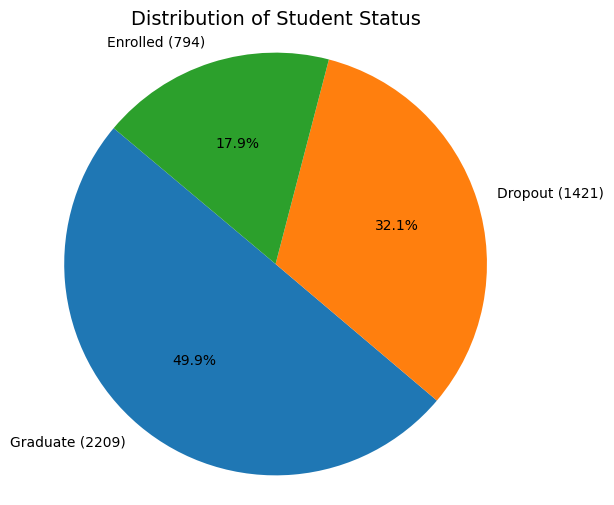

In [ ]:
plot_pie_distribution(df_decode['Status'], 'Student Status')

Most students graduated (49.9%), followed by dropouts (32.1%) and currently enrolled students (17.9%)

## Categorical Features Categorical Features vs Target (Status)

This section explores how categorical features relate to student outcomes by comparing their distribution across the target variable (Status). It helps identify which categories are more associated with dropout, enrollment, or graduation

Although stored as numeric, several features represent categories. Therefore, features like Gender, Marital_status, Debtor, and others are treated as categorical to explore their relationship with Status (Dropout, Graduate, Enrolled)



In [ ]:
def plot_cat_status(data, feature, target='Status', figsize=(8,5)):
    """
    Plot horizontal barplot to show distribution of a categorical feature grouped by target,
    with count labels on bars.

    Parameters:
    - data: DataFrame
    - feature: str, categorical feature to plot (on y-axis)
    - target: str, target variable (default 'Status')
    - figsize: tuple, figure size

    Returns:
    - None (shows plot)
    """
    plt.figure(figsize=figsize)
    ax = sns.countplot(y=feature, hue=target, data=data, order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature} by {target}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.legend(title=target, loc='upper right')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Add count labels on bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        y = p.get_y()
        if width > 0:
          ax.annotate(f'{int(width)}', (width, y + height/2),
                    ha='left', va='center', xytext=(5,0), textcoords='offset points')

    plt.show()

In [ ]:
def plot_feature_distribution(data, feature, figsize=(6, 4)):
    plt.figure(figsize=figsize)
    counts = data[feature].value_counts()
    ax = sns.barplot(x=counts.index, y=counts.values)
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

### Gender vs Status

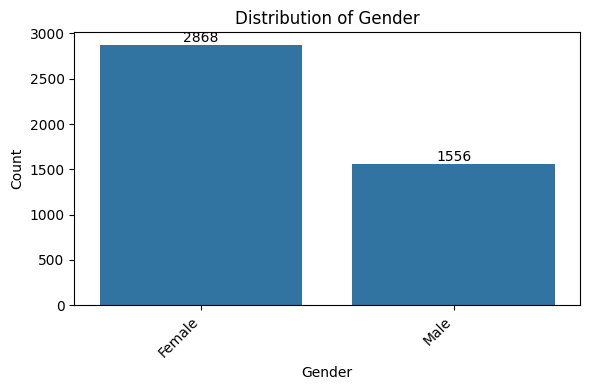

In [ ]:
plot_feature_distribution(df_decode, 'Gender')

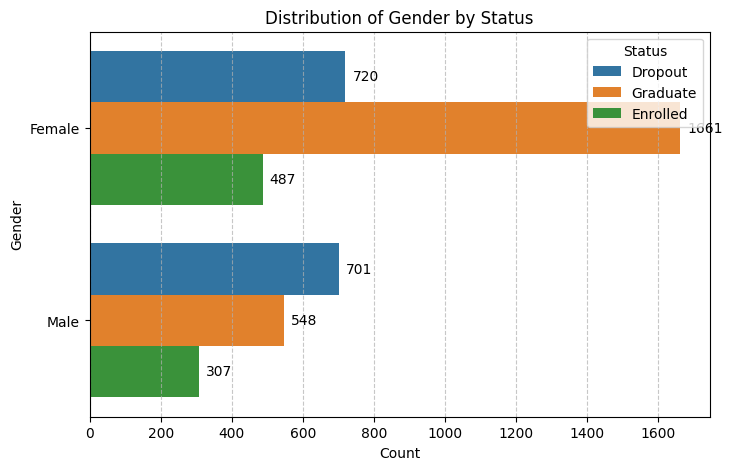

In [ ]:
plot_cat_status(df_decode, 'Gender')

Based on the gender distribution, female students outnumber male students in this dataset. Female students also have a higher graduation count, indicating better academic outcomes. While the number of female dropouts is also higher in absolute terms, more females tend to graduate

### Marital Status vs Status

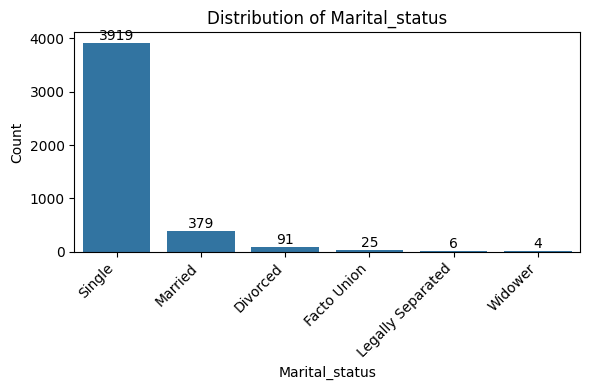

In [ ]:
plot_feature_distribution(df_decode, 'Marital_status')

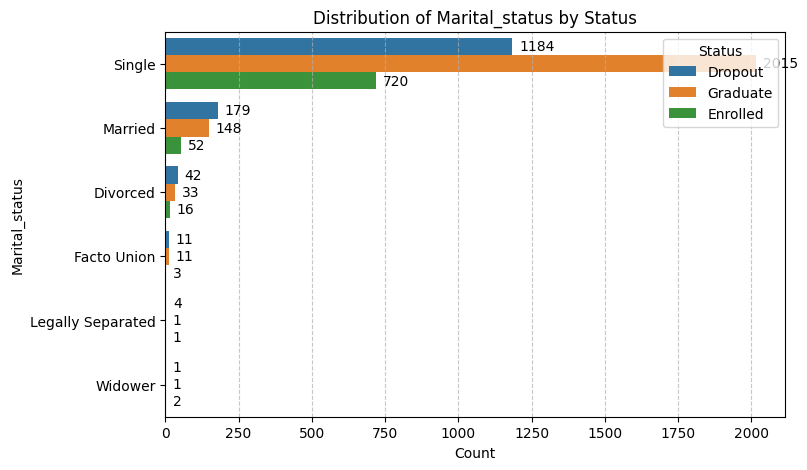

In [ ]:
plot_cat_status(df_decode, 'Marital_status')

Based on the distribution of marital status, single students make up the majority in the dataset. Among them, 1,184 students dropped out, which is a large number in absolute terms but given the high total number of single students, this could reflect their overall representation rather than a higher dropout rate

Meanwhile, married students have a much smaller representation, but with 179 dropouts out of a smaller group, the proportion of dropouts appears higher relative to their total

### Scholarship Holder vs Status

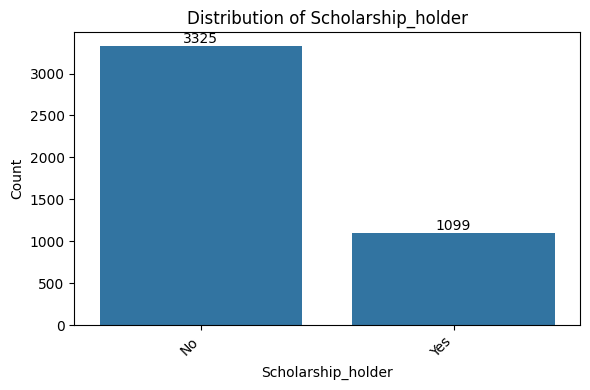

In [ ]:
plot_feature_distribution(df_decode, 'Scholarship_holder')

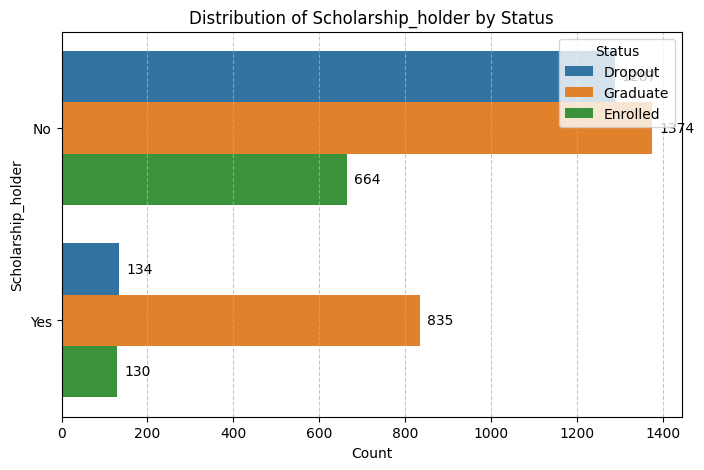

In [ ]:
plot_cat_status(df_decode, 'Scholarship_holder')

The majority of students in the dataset do not receive a scholarship. Within this group, there is also a notably high number of dropouts, making it the largest contributor to overall dropout cases

While many of these students do successfully graduate, the fact that most dropouts come from non-scholarship holders suggests that financial support might play a role in a student’s ability to persist through their studies

### Debtor vs Status

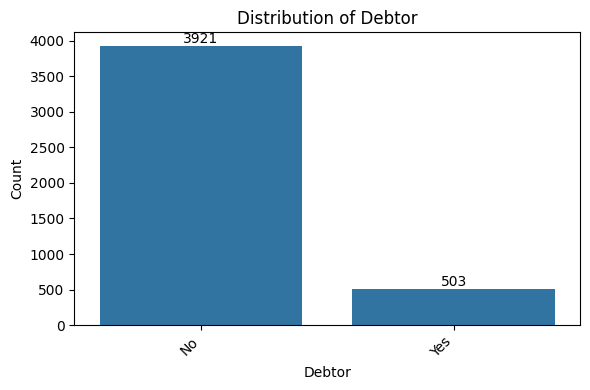

In [ ]:
plot_feature_distribution(df_decode, 'Debtor')

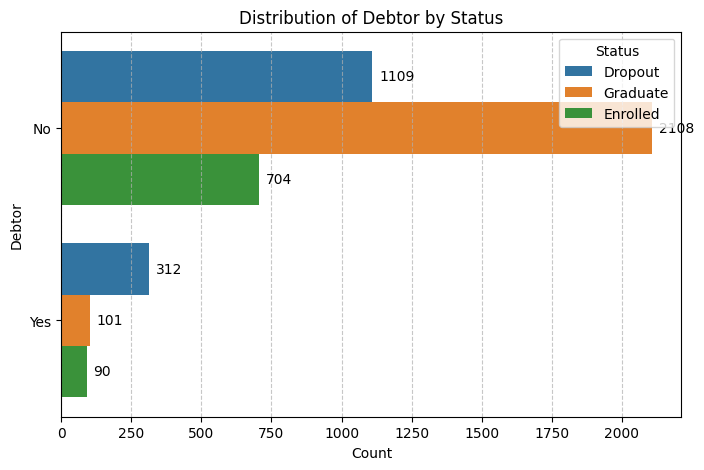

In [ ]:
plot_cat_status(df_decode, 'Debtor')

The majority of students in the dataset are not debtors. Within this group, there is a large number of dropouts

Students who are debtors form a smaller group but still show a notable number of dropouts, indicating that this group also experiences significant dropout risk

### Tuition Fees Up To Date vs Status

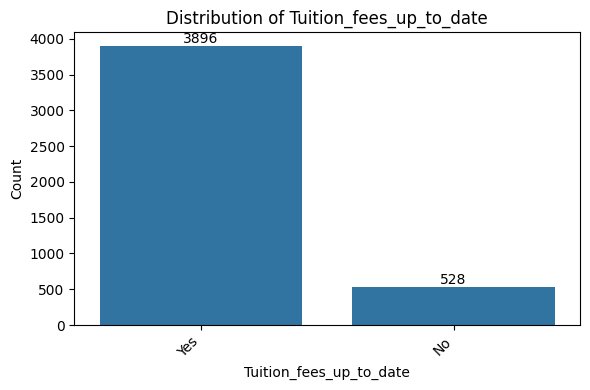

In [ ]:
plot_feature_distribution(df_decode, 'Tuition_fees_up_to_date')

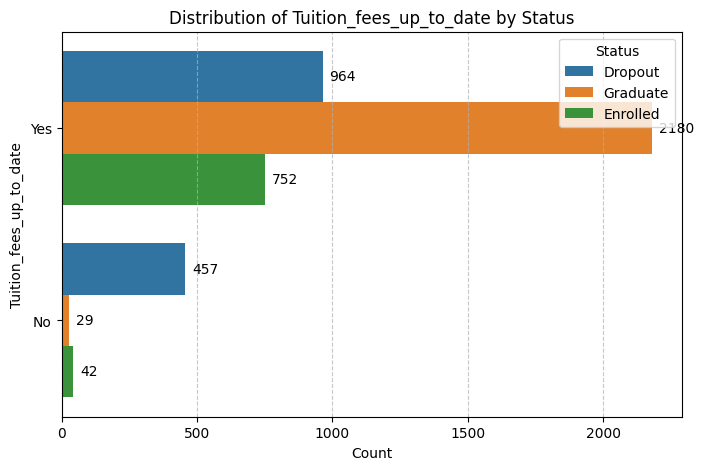

In [ ]:
plot_cat_status(df_decode, 'Tuition_fees_up_to_date')

Most students have their tuition fees up to date, yet there is still a high number of dropouts in this group.
Students who are behind on payments have fewer dropouts, but the feature remains important for predicting dropout risk

## Numerical Features vs Target (Status)

To explore how numerical features differ across each status category (Dropout, Enrolled, Graduate). This helps identify whether some numerical features (e.g., grades, age, etc.) are linked to higher dropout rates

In [ ]:
def plot_num_status(data, feature, target='Status', kind='box', figsize=(6,4)):
    """
    Plot distribution of a numerical feature grouped by target category using boxplot or violinplot.

    Parameters:
    - data: DataFrame
    - feature: str, numerical feature to plot
    - target: str, categorical target (default 'Status')
    - kind: 'box' or 'violin'
    - figsize: tuple, figure size

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=figsize)

    if kind == 'violin':
        sns.violinplot(x=target, y=feature, data=data)
    else:
        sns.boxplot(x=target, y=feature, data=data)

    plt.title(f'{feature} by {target}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

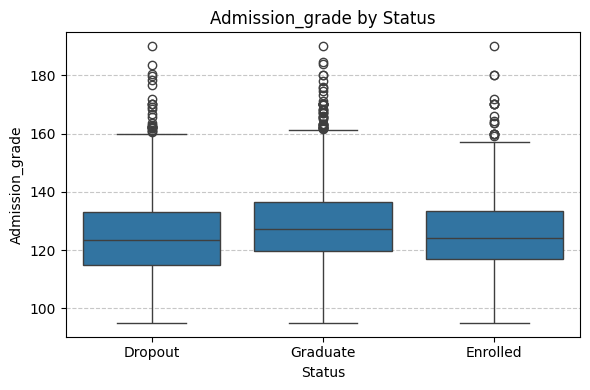

In [ ]:
plot_num_status(df_decode, 'Admission_grade')

The boxplot shows the distribution of admission grades across student statuses. Overall, the median admission grade is slightly higher for graduates compared to dropouts and enrolled students. However, the grade distributions are quite similar across all groups, with noticeable outliers on the higher end

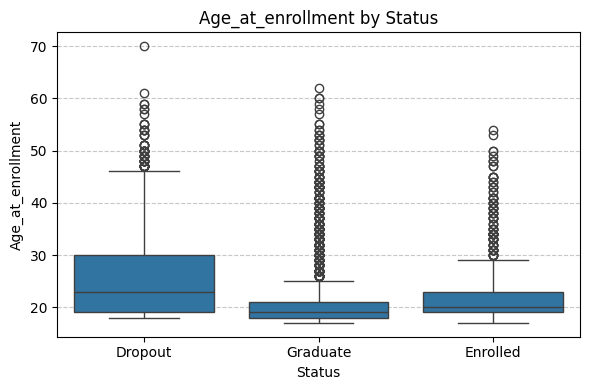

In [ ]:
plot_num_status(df_decode, 'Age_at_enrollment')

This boxplot shows the distribution of student ages at enrollment based on their status. Dropout students tend to have a wider and higher age distribution compared to graduates and enrolled students, with many outliers. This suggests that older students are more likely to drop out

## Top 5 Courses by Student Status

Identifies the five most common study programs for each academic outcome: Dropout, Graduate, and Enrolled. By analyzing the distribution of student status within each course, we can observe which programs have higher dropout tendencies or graduation rates, providing insights for potential intervention or support

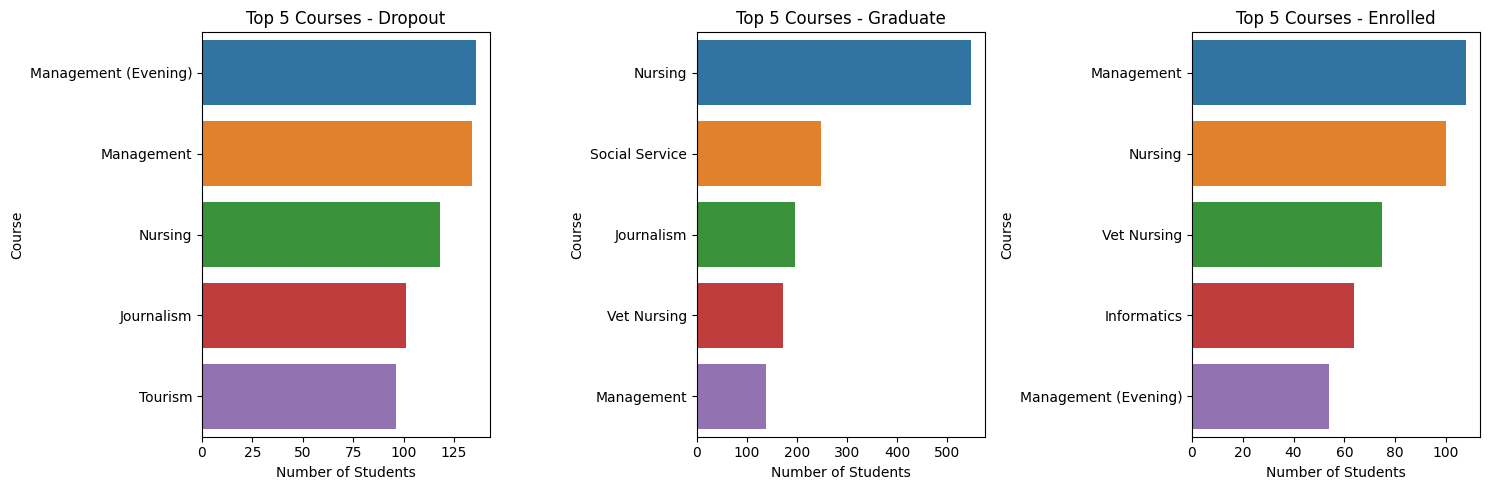

In [ ]:
def plot_top_courses_by_status(df, status_col='Status', course_col='Course', top_n=5):
    statuses = df[status_col].unique()
    plt.figure(figsize=(15,5))

    for i, status in enumerate(statuses):
        plt.subplot(1, len(statuses), i+1)
        top_courses = (df[df[status_col] == status]
                       .groupby(course_col).size()
                       .reset_index(name='Count')
                       .sort_values(by='Count', ascending=False)
                       .head(top_n))
        sns.barplot(data=top_courses, x='Count', y=course_col, hue=course_col, dodge=False, legend=False)
        plt.title(f'Top {top_n} Courses - {status}')
        plt.xlabel('Number of Students')
        plt.ylabel('Course')

    plt.tight_layout()
    plt.show()

plot_top_courses_by_status(df_decode)

Nursing has the highest number of graduates, while Management (Evening) shows the most dropouts. For enrolled students, Management and Nursing remain the most popular courses

# Data Preparation / Preprocessing

In [ ]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

Removed students with "Enrolled" status and converted "Status" into binary: 1 = Dropout, 0 = Graduate, to focus on dropout prediction

In [ ]:
df = df[df['Status'] != 1]
df = df.reset_index(drop=True)

df.loc[:, 'Status'] = df['Status'].replace({2: 1})
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [ ]:
df['Status'].value_counts()

,count
Status,
1,2209
0,1421


In this dataset, the target variable is Status, indicating whether a student is a Graduate or a Dropout

In [ ]:
# Save the preprocessed dataset for dropout prediction modeling
df.to_csv('student_dropout_model_data.csv', index=False)

### Data Spliting

Split the dataset into feature variables (X) and the target variable (y) as a label

In [ ]:
X = df.drop(['Status'], axis=1)
y = df['Status']

### Data Resampling

Use SMOTE to handle class imbalance by generating synthetic samples for the minority class

In [ ]:
smote = SMOTE(random_state=20241124)
X_smote, y_smote = smote.fit_resample(X, y)

y_counter = collections.Counter(y)
y_smote_counter = collections.Counter(y_smote)

df_comparison = pd.DataFrame({
    'None': y_counter,
    'SMOTE': y_smote_counter
})

df_comparison.loc['Total'] = [sum(y_counter.values()), sum(y_smote_counter.values())]
df_comparison

,None,SMOTE
0,1421,2209
1,2209,2209
Total,3630,4418


### Train-Test Split

Split the resampled dataset into training and testing sets to evaluate model performance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (3534, 36)
y_train : (3534,)
X_test  : (884, 36)
y_test  : (884,)


### Data Standardization

Standardize the feature variables to have zero mean and unit variance, improving model training stability



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train:\n{X_train}\n')
print(f'X_test:\n{X_test}')

X_train:
[[-0.2957144  -0.65160657  0.25374934 ...  0.41405436  1.83384596
  -0.75911097]
 [-0.2957144  -0.133637   -0.53843278 ... -0.19620392 -0.46166595
   0.93409555]
 [-0.2957144  -1.05447179  0.25374934 ... -1.53114392  1.01930948
   0.16031838]
 ...
 [ 6.6597245   1.13251084 -0.53843278 ...  0.87174807 -1.12810489
   0.37424501]
 [-0.2957144  -1.05447179  0.25374934 ... -0.19620392 -0.46166595
   0.93409555]
 [-0.2957144  -1.05447179 -0.53843278 ... -0.60911285 -1.3002327
  -0.94549642]]

X_test:
[[-0.2957144  -0.65160657  1.04593146 ... -0.84460335 -1.49834874
  -1.4054425 ]
 [ 1.44314532  1.36271954 -0.53843278 ... -1.53114392  1.01930948
   0.16031838]
 [-0.2957144  -0.70915874 -0.53843278 ...  0.29963093 -0.53571472
   0.82940805]
 ...
 [-0.2957144  -0.07608482 -0.53843278 ... -0.19620392 -0.46166595
   0.93409555]
 [-0.2957144  -1.05447179 -0.53843278 ... -1.53114392  1.01930948
   0.16031838]
 [-0.2957144   1.13251084 -0.53843278 ...  0.29963093 -0.53571472
   0.82940805]]

# Modeling

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=10000),
    'SVM': SVC(class_weight='balanced', max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Evaluation

In [ ]:
accuracy, precision, recall, f1 = {}, {}, {}, {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy[name] = accuracy_score(y_test, y_pred)
    precision[name] = precision_score(y_test, y_pred)
    recall[name] = recall_score(y_test, y_pred)
    f1[name] = f1_score(y_test, y_pred)

model_metrics = pd.DataFrame({
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

model_metrics

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.909502,0.885106,0.941176,0.912281
SVM,0.904977,0.865306,0.959276,0.909871
Decision Tree,0.872172,0.876430,0.866516,0.871445
Gradient Boosting,0.908371,0.881607,0.943439,0.911475
Random Forest,0.908371,0.880000,0.945701,0.911668
KNN,0.848416,0.818182,0.895928,0.855292
Naive Bayes,0.850679,0.817623,0.902715,0.858065


Based on the evaluation metrics of all models, the Logistic Regression model demonstrates the most balanced performance with an accuracy of 0.91, along with high precision, recall, and F1-score

In [ ]:
lr_model = LogisticRegression(class_weight='balanced', max_iter=10000).fit(X_train, y_train)

In [ ]:
y_train_lr = lr_model.predict(X_train)
y_test_lr = lr_model.predict(X_test)

In [ ]:
def evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Attrition', fontsize=10)
    plt.xlabel('Predicted Label Attrition', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report on Training Data
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1767
           1       0.90      0.94      0.92      1767

    accuracy                           0.92      3534
   macro avg       0.92      0.92      0.92      3534
weighted avg       0.92      0.92      0.92      3534



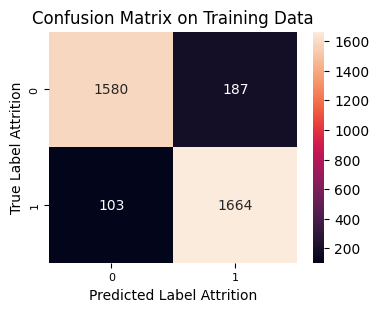

In [ ]:
evaluation_report(y_train, y_train_lr, title='Training Data')

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       442
           1       0.89      0.94      0.91       442

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884



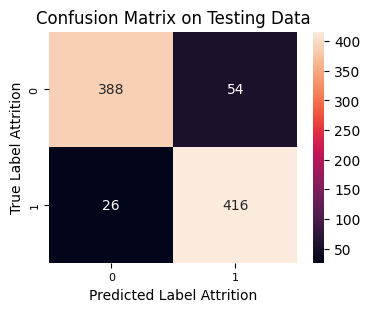

In [ ]:
evaluation_report(y_test, y_test_lr, title='Testing Data')

## Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning for Logistic Regression using Grid Search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

logreg = LogisticRegression(random_state=2024)
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=2024), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
# Fit for the best model params estimators
best_model = grid_search.fit(X_train, y_train)
best_model.best_estimator_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

LogisticRegression(C=0.1, penalty='l1', random_state=2024, solver='saga')

In [ ]:
# Predict the training and testing data using the best model
y_train_best = best_model.predict(X_train)
y_test_best = best_model.predict(X_test)

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1767
           1       0.90      0.94      0.92      1767

    accuracy                           0.91      3534
   macro avg       0.91      0.91      0.91      3534
weighted avg       0.91      0.91      0.91      3534



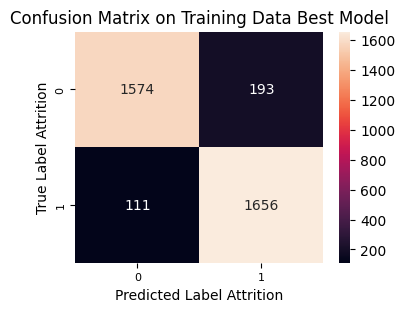

In [ ]:
evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Classification Report on Testing Data Best Model
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       442
           1       0.89      0.94      0.91       442

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884



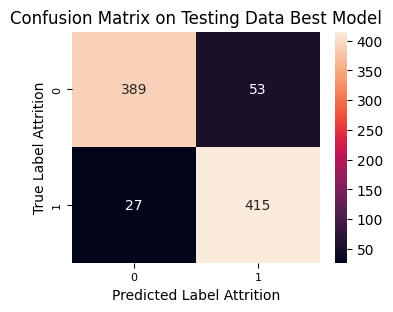

In [ ]:
evaluation_report(y_test, y_test_best, title='Testing Data Best Model')

# Deployment

In [ ]:
# Save the model to a file
joblib.dump(best_model, 'lr_model.joblib')

['lr_model.joblib']

In [ ]:
!pip freeze > requirements.txt